In [1]:
!pip install faker


In [2]:
import pandas as pd
import numpy as np
import random
from faker import Faker

# Initialize faker
fake = Faker()

# Number of rows
n = 120000

# Categories and products
categories = {
    "Electronics": ["Smartphone", "Laptop", "Tablet", "Headphones", "Smartwatch"],
    "Furniture": ["Chair", "Table", "Sofa", "Bed", "Wardrobe"],
    "Clothing": ["Shirt", "Jeans", "Jacket", "Dress", "Shoes"],
    "Groceries": ["Rice", "Milk", "Eggs", "Bread", "Oil"],
    "Sports": ["Football", "Tennis Racket", "Cricket Bat", "Basketball", "Gym Bag"]
}

regions = ["North", "South", "East", "West"]
payment_modes = ["Credit Card", "Debit Card", "Net Banking", "UPI", "Cash on Delivery"]

# Generate data
data = []
for i in range(n):
    order_id = f"ORD{100000+i}"
    order_date = fake.date_between(start_date="-5y", end_date="today")
    customer_id = f"CUST{random.randint(1000, 9999)}"
    
    category = random.choice(list(categories.keys()))
    product = random.choice(categories[category])
    
    quantity = random.randint(1, 10)
    unit_price = round(random.uniform(5, 2000), 2)
    discount = round(random.uniform(0, 0.3), 2)  # 0–30%
    
    revenue = round((quantity * unit_price) * (1 - discount), 2)
    
    region = random.choice(regions)
    payment_mode = random.choice(payment_modes)
    
    data.append([order_id, order_date, customer_id, category, product, quantity, unit_price, discount, revenue, region, payment_mode])

# Create DataFrame
df = pd.DataFrame(data, columns=[
    "Order_ID", "Order_Date", "Customer_ID", "Product_Category", "Product_Name",
    "Quantity", "Unit_Price", "Discount", "Revenue", "Region", "Payment_Mode"
])

# Save to CSV
df.to_csv("sales_data.csv", index=False)

print("✅ Dataset generated successfully with shape:", df.shape)
print(df.head())


✅ Dataset generated successfully with shape: (120000, 11)
    Order_ID  Order_Date Customer_ID Product_Category Product_Name  Quantity  \
0  ORD100000  2022-11-28    CUST2370      Electronics   Smartwatch         9   
1  ORD100001  2023-06-13    CUST5192           Sports      Gym Bag         6   
2  ORD100002  2024-04-15    CUST3260           Sports   Basketball         8   
3  ORD100003  2022-08-03    CUST9347      Electronics   Smartphone        10   
4  ORD100004  2021-12-29    CUST4234         Clothing        Dress        10   

   Unit_Price  Discount   Revenue Region      Payment_Mode  
0     1804.42      0.00  16239.78  South               UPI  
1      977.27      0.09   5335.89  South       Credit Card  
2      600.95      0.25   3605.70  North       Credit Card  
3      796.64      0.15   6771.44  South  Cash on Delivery  
4     1306.65      0.14  11237.19  North        Debit Card  


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use("seaborn-v0_8")


In [4]:
# Load CSV
df = pd.read_csv("sales_data.csv")

# Preview
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (120000, 11)


,Order_ID,Order_Date,Customer_ID,Product_Category,Product_Name,Quantity,Unit_Price,Discount,Revenue,Region,Payment_Mode
0,ORD100000,2022-11-28,CUST2370,Electronics,Smartwatch,9,1804.42,0.00,16239.78,South,UPI
1,ORD100001,2023-06-13,CUST5192,Sports,Gym Bag,6,977.27,0.09,5335.89,South,Credit Card
2,ORD100002,2024-04-15,CUST3260,Sports,Basketball,8,600.95,0.25,3605.70,North,Credit Card
3,ORD100003,2022-08-03,CUST9347,Electronics,Smartphone,10,796.64,0.15,6771.44,South,Cash on Delivery
4,ORD100004,2021-12-29,CUST4234,Clothing,Dress,10,1306.65,0.14,11237.19,North,Debit Card


In [5]:
# Missing values
print("Missing values:\n", df.isnull().sum())

# Duplicates
print("Duplicate rows:", df.duplicated().sum())

# Convert to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Feature engineering
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month
df['Weekday'] = df['Order_Date'].dt.day_name()

# Safety check for revenue
df['Calculated_Revenue'] = (df['Quantity'] * df['Unit_Price']) * (1 - df['Discount'])

df.head()


Missing values:
 Order_ID            0
Order_Date          0
Customer_ID         0
Product_Category    0
Product_Name        0
Quantity            0
Unit_Price          0
Discount            0
Revenue             0
Region              0
Payment_Mode        0
dtype: int64
Duplicate rows: 0


,Order_ID,Order_Date,Customer_ID,Product_Category,Product_Name,Quantity,Unit_Price,Discount,Revenue,Region,Payment_Mode,Year,Month,Weekday,Calculated_Revenue
0,ORD100000,2022-11-28,CUST2370,Electronics,Smartwatch,9,1804.42,0.00,16239.78,South,UPI,2022,11,Monday,16239.7800
1,ORD100001,2023-06-13,CUST5192,Sports,Gym Bag,6,977.27,0.09,5335.89,South,Credit Card,2023,6,Tuesday,5335.8942
2,ORD100002,2024-04-15,CUST3260,Sports,Basketball,8,600.95,0.25,3605.70,North,Credit Card,2024,4,Monday,3605.7000
3,ORD100003,2022-08-03,CUST9347,Electronics,Smartphone,10,796.64,0.15,6771.44,South,Cash on Delivery,2022,8,Wednesday,6771.4400
4,ORD100004,2021-12-29,CUST4234,Clothing,Dress,10,1306.65,0.14,11237.19,North,Debit Card,2021,12,Wednesday,11237.1900


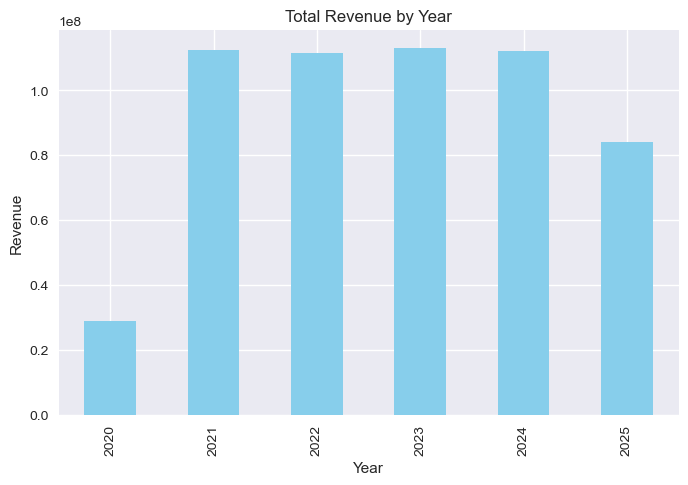

In [6]:
sales_by_year = df.groupby('Year')['Revenue'].sum()

plt.figure(figsize=(8,5))
sales_by_year.plot(kind='bar', color='skyblue')
plt.title("Total Revenue by Year")
plt.ylabel("Revenue")
plt.show()


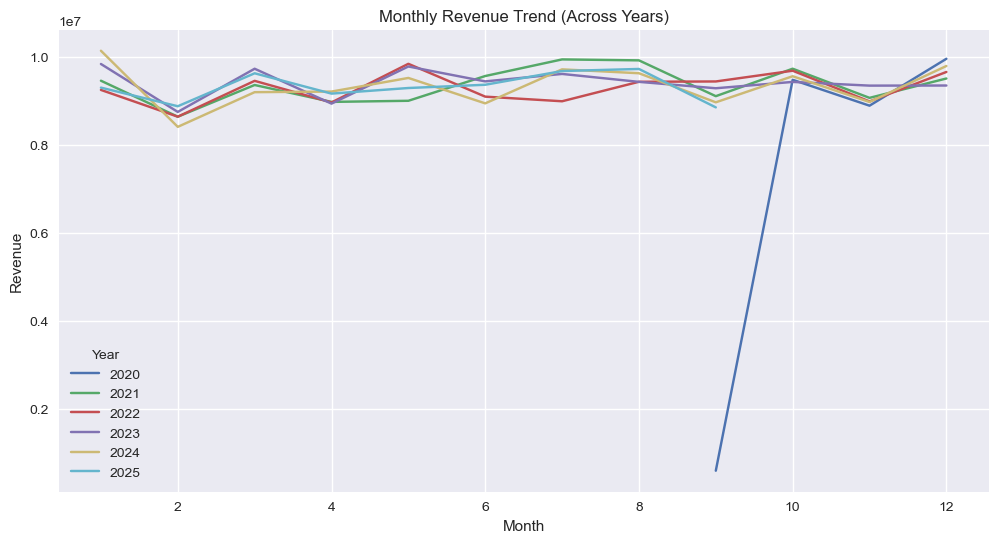

In [7]:
monthly_sales = df.groupby(['Year','Month'])['Revenue'].sum().unstack()

monthly_sales.T.plot(figsize=(12,6))
plt.title("Monthly Revenue Trend (Across Years)")
plt.ylabel("Revenue")
plt.show()


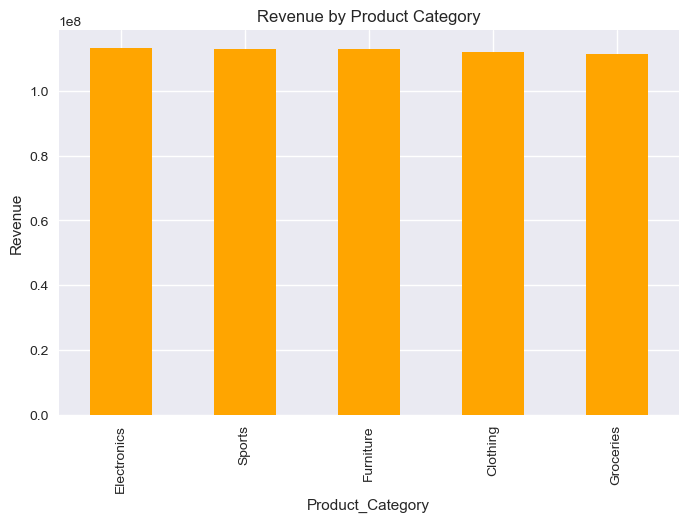

In [8]:
category_sales = df.groupby('Product_Category')['Revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
category_sales.plot(kind='bar', color='orange')
plt.title("Revenue by Product Category")
plt.ylabel("Revenue")
plt.show()


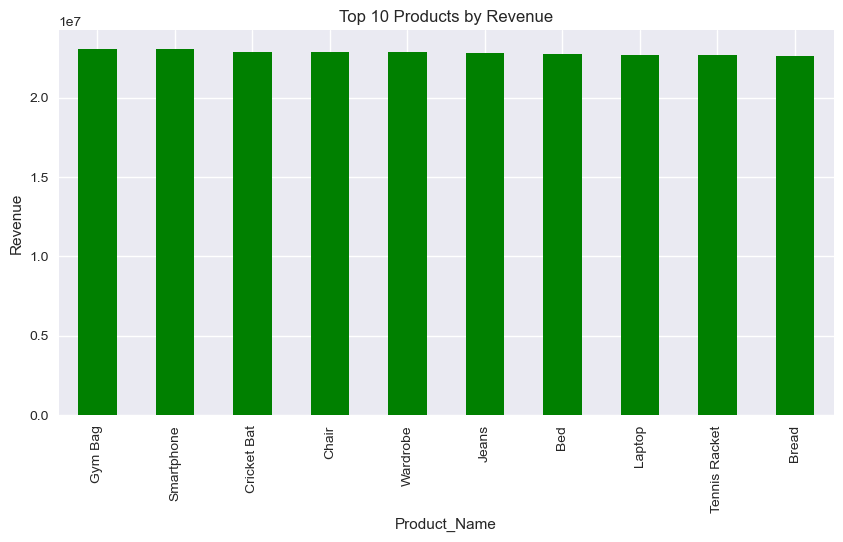

In [9]:
top_products = df.groupby('Product_Name')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_products.plot(kind='bar', color='green')
plt.title("Top 10 Products by Revenue")
plt.ylabel("Revenue")
plt.show()


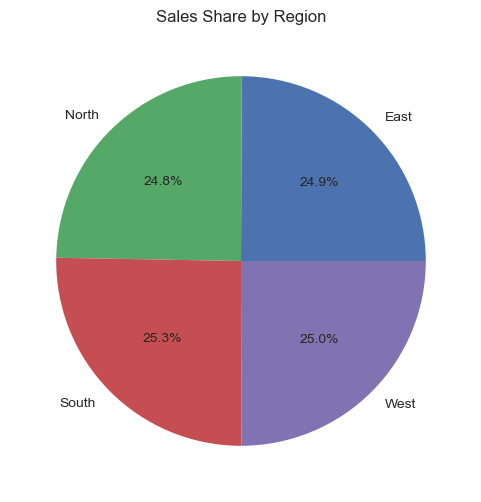

In [10]:
region_sales = df.groupby('Region')['Revenue'].sum()

plt.figure(figsize=(6,6))
region_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title("Sales Share by Region")
plt.ylabel("")
plt.show()


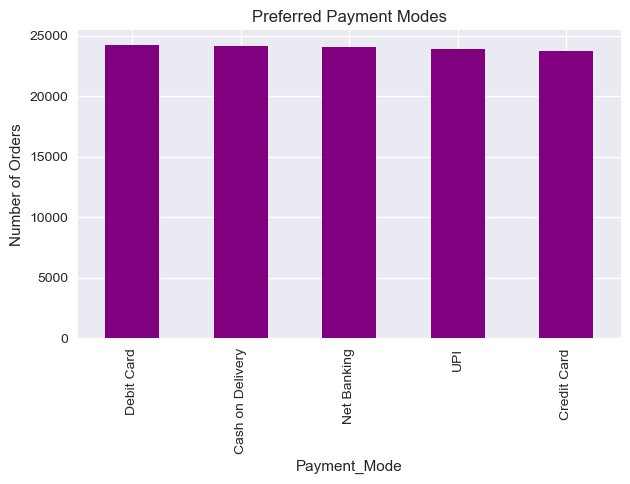

In [11]:
payment_counts = df['Payment_Mode'].value_counts()

plt.figure(figsize=(7,4))
payment_counts.plot(kind='bar', color='purple')
plt.title("Preferred Payment Modes")
plt.ylabel("Number of Orders")
plt.show()


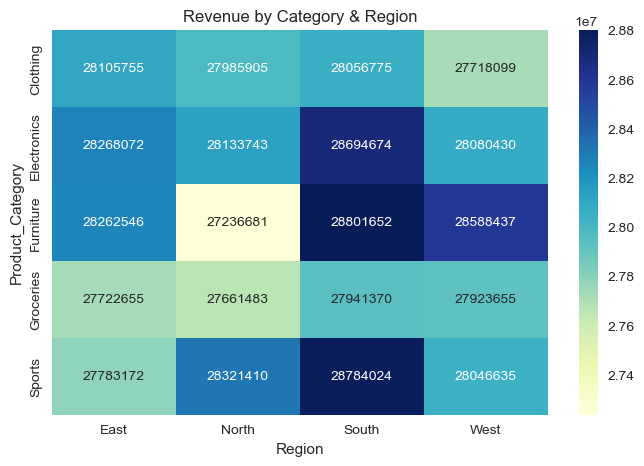

In [12]:
pivot_category_region = df.pivot_table(
    values="Revenue", 
    index="Product_Category", 
    columns="Region", 
    aggfunc="sum"
)

plt.figure(figsize=(8,5))
sns.heatmap(pivot_category_region, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Revenue by Category & Region")
plt.show()


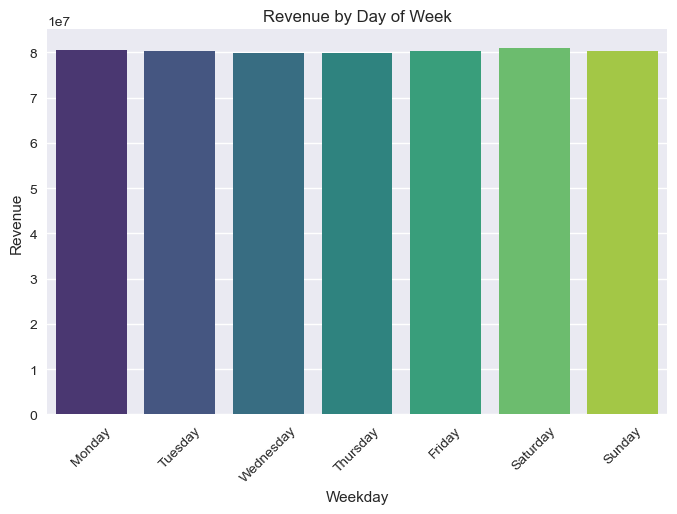

In [13]:
weekday_sales = df.groupby("Weekday")["Revenue"].sum().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

plt.figure(figsize=(8,5))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, hue=weekday_sales.index, palette="viridis", legend=False)
plt.title("Revenue by Day of Week")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()


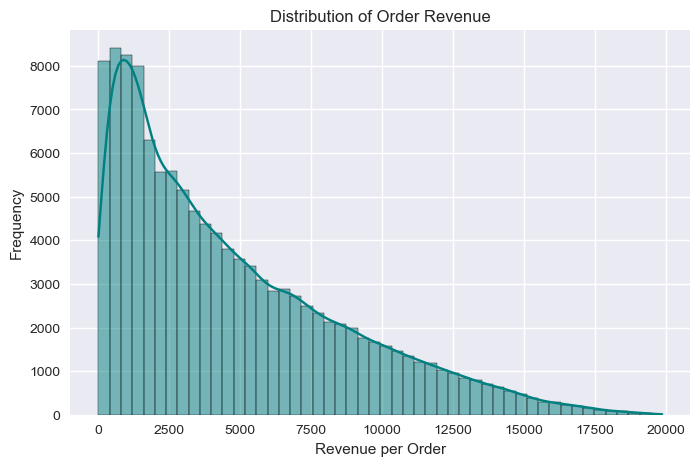

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df['Revenue'], bins=50, kde=True, color="teal")
plt.title("Distribution of Order Revenue")
plt.xlabel("Revenue per Order")
plt.ylabel("Frequency")
plt.show()


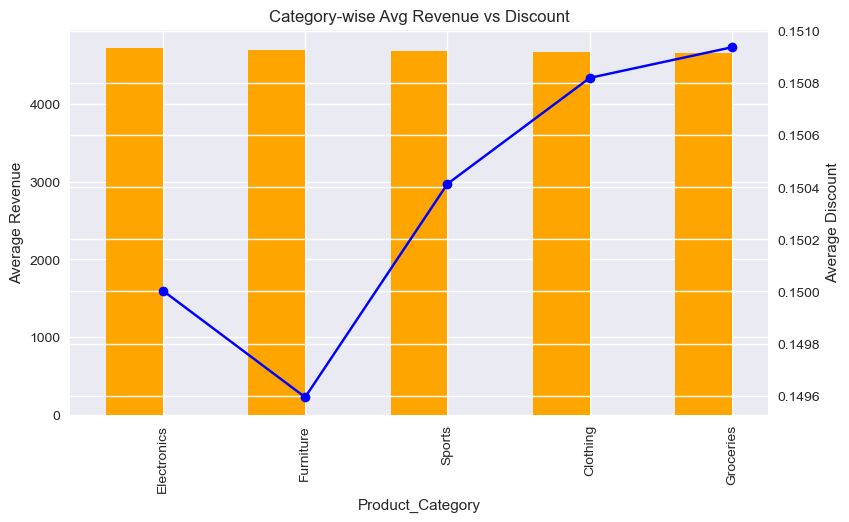

In [15]:
category_discount = df.groupby("Product_Category")[["Discount","Revenue"]].mean().sort_values("Revenue", ascending=False)

fig, ax1 = plt.subplots(figsize=(9,5))
ax2 = ax1.twinx()

category_discount["Revenue"].plot(kind="bar", ax=ax1, color="orange", width=0.4, position=1)
category_discount["Discount"].plot(kind="line", ax=ax2, color="blue", marker="o")

ax1.set_ylabel("Average Revenue")
ax2.set_ylabel("Average Discount")
plt.title("Category-wise Avg Revenue vs Discount")
plt.show()


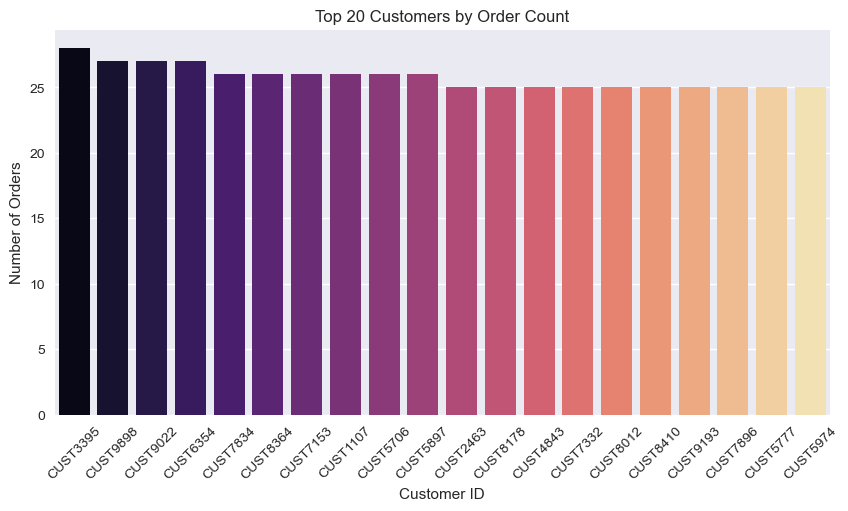

In [16]:

customer_freq = df['Customer_ID'].value_counts().head(20)

plt.figure(figsize=(10,5))
sns.barplot(x=customer_freq.index, y=customer_freq.values, hue=customer_freq.index, palette="magma", legend=False)
plt.title("Top 20 Customers by Order Count")
plt.xlabel("Customer ID")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()


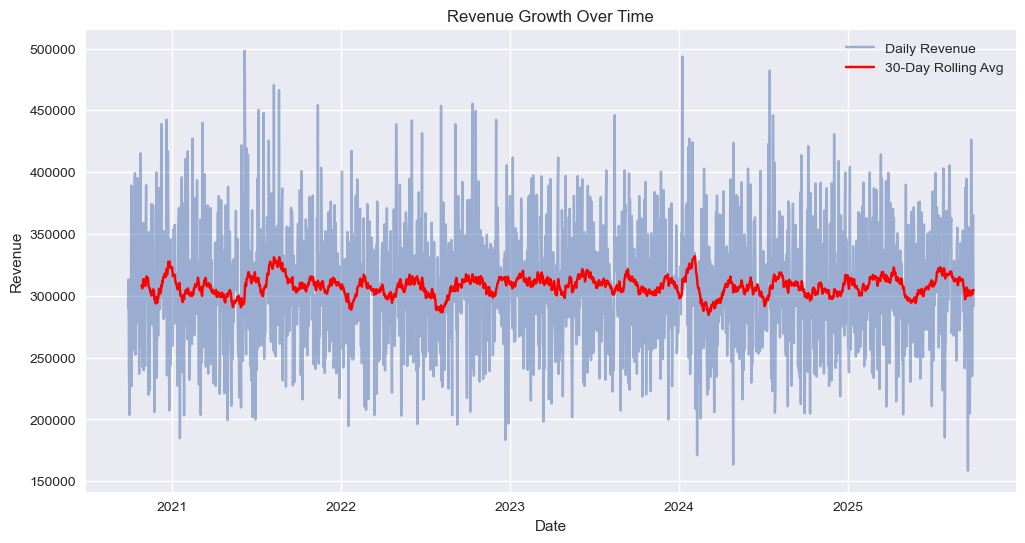

In [17]:
time_sales = df.groupby("Order_Date")["Revenue"].sum().reset_index()
time_sales['Rolling_Avg'] = time_sales['Revenue'].rolling(window=30).mean()

plt.figure(figsize=(12,6))
plt.plot(time_sales['Order_Date'], time_sales['Revenue'], label="Daily Revenue", alpha=0.5)
plt.plot(time_sales['Order_Date'], time_sales['Rolling_Avg'], label="30-Day Rolling Avg", color="red")
plt.title("Revenue Growth Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.show()
